# Prediction based on probability - Combine loan grade with loan intent

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [2]:
import loan_approval_lib
from loan_approval_lib import logspace, linspace

In [3]:
data = loan_approval_lib.load_data()

In [4]:
data_train = data['train']

In [5]:
data_test = data['test']

In [6]:
len(data_test)

39098

In [7]:
data_train

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [8]:
data_test

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
39093,97738,22,31200,MORTGAGE,2.0,DEBTCONSOLIDATION,B,3000,10.37,0.10,N,4
39094,97739,22,48000,MORTGAGE,6.0,EDUCATION,A,7000,6.03,0.15,N,3
39095,97740,51,60000,MORTGAGE,0.0,PERSONAL,A,15000,7.51,0.25,N,25
39096,97741,22,36000,MORTGAGE,4.0,PERSONAL,D,14000,15.62,0.39,Y,4


In [9]:
data_train['loan_grade'].unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [10]:
data_train['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'PERSONAL', 'VENTURE', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [12]:
data_train[['loan_grade', 'loan_intent', 'loan_status']].groupby(['loan_grade', 'loan_intent']).aggregate(['mean', 'sum'])

loan_status     
                                    mean  sum
loan_grade loan_intent                       
A          DEBTCONSOLIDATION    0.054374  184
           EDUCATION            0.046712  206
           HOMEIMPROVEMENT      0.057863  124
           MEDICAL              0.061451  227
           PERSONAL             0.051150  189
           VENTURE              0.027884  102
B          DEBTCONSOLIDATION    0.115571  357
           EDUCATION            0.094729  399
           HOMEIMPROVEMENT      0.133495  275
           MEDICAL              0.106703  425
           PERSONAL             0.119656  417
           VENTURE              0.059927  214
C          DEBTCONSOLIDATION    0.156138  262
           EDUCATION            0.107680  272
           HOMEIMPROVEMENT      0.197479  235
           MEDICAL              0.147114  316
           PERSONAL             0.129705  224
           VENTURE              0.104697  185
D          DEBTCONSOLIDATION    0.938095  788
           EDUCATION            0.364155  319
           HOMEIMPROVEMENT      0.517341  358
           MEDICAL              0.870536  780
           PERSONAL             0.449679  420
           VENTURE              0.405779  323
E          DEBTCONSOLIDATION    0.974790  116
           EDUCATION            0.514019  110
           HOMEIMPROVEMENT      0.505814   87
           MEDICAL              0.936782  163
           PERSONAL             0.451389   65
           VENTURE              0.483871   90
F          DEBTCONSOLIDATION    0.952381   20
           EDUCATION            0.392857   11
           HOMEIMPROVEMENT      0.545455   12
           MEDICAL              0.965517   28
           PERSONAL             0.458333   11
           VENTURE              0.360000    9
G          DEBTCONSOLIDATION    1.000000    2
           EDUCATION            1.000000    5
           HOMEIMPROVEMENT      0.000000    0
           MEDICAL              1.000000   10
           PERSONAL             0.571429    4
           VENTURE              0.750000    6

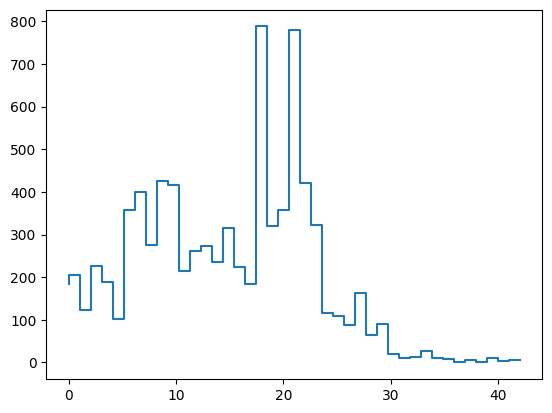

In [33]:
tmp = data_train[['loan_grade', 'loan_intent', 'loan_status']].groupby(['loan_grade', 'loan_intent']).aggregate(['mean', 'sum'])
_ = plt.step(numpy.linspace(0, len(tmp.index), len(tmp.index)), tmp['loan_status']['sum'])

In [34]:
model = data_train[['loan_grade', 'loan_intent', 'loan_status']].groupby(['loan_grade', 'loan_intent']).aggregate(['mean', 'sum'])

In [35]:
model

loan_status     
                                    mean  sum
loan_grade loan_intent                       
A          DEBTCONSOLIDATION    0.054374  184
           EDUCATION            0.046712  206
           HOMEIMPROVEMENT      0.057863  124
           MEDICAL              0.061451  227
           PERSONAL             0.051150  189
           VENTURE              0.027884  102
B          DEBTCONSOLIDATION    0.115571  357
           EDUCATION            0.094729  399
           HOMEIMPROVEMENT      0.133495  275
           MEDICAL              0.106703  425
           PERSONAL             0.119656  417
           VENTURE              0.059927  214
C          DEBTCONSOLIDATION    0.156138  262
           EDUCATION            0.107680  272
           HOMEIMPROVEMENT      0.197479  235
           MEDICAL              0.147114  316
           PERSONAL             0.129705  224
           VENTURE              0.104697  185
D          DEBTCONSOLIDATION    0.938095  788
           EDUCATION            0.364155  319
           HOMEIMPROVEMENT      0.517341  358
           MEDICAL              0.870536  780
           PERSONAL             0.449679  420
           VENTURE              0.405779  323
E          DEBTCONSOLIDATION    0.974790  116
           EDUCATION            0.514019  110
           HOMEIMPROVEMENT      0.505814   87
           MEDICAL              0.936782  163
           PERSONAL             0.451389   65
           VENTURE              0.483871   90
F          DEBTCONSOLIDATION    0.952381   20
           EDUCATION            0.392857   11
           HOMEIMPROVEMENT      0.545455   12
           MEDICAL              0.965517   28
           PERSONAL             0.458333   11
           VENTURE              0.360000    9
G          DEBTCONSOLIDATION    1.000000    2
           EDUCATION            1.000000    5
           HOMEIMPROVEMENT      0.000000    0
           MEDICAL              1.000000   10
           PERSONAL             0.571429    4
           VENTURE              0.750000    6

In [36]:
model.index

MultiIndex([('A', 'DEBTCONSOLIDATION'),
            ('A',         'EDUCATION'),
            ('A',   'HOMEIMPROVEMENT'),
            ('A',           'MEDICAL'),
            ('A',          'PERSONAL'),
            ('A',           'VENTURE'),
            ('B', 'DEBTCONSOLIDATION'),
            ('B',         'EDUCATION'),
            ('B',   'HOMEIMPROVEMENT'),
            ('B',           'MEDICAL'),
            ('B',          'PERSONAL'),
            ('B',           'VENTURE'),
            ('C', 'DEBTCONSOLIDATION'),
            ('C',         'EDUCATION'),
            ('C',   'HOMEIMPROVEMENT'),
            ('C',           'MEDICAL'),
            ('C',          'PERSONAL'),
            ('C',           'VENTURE'),
            ('D', 'DEBTCONSOLIDATION'),
            ('D',         'EDUCATION'),
            ('D',   'HOMEIMPROVEMENT'),
            ('D',           'MEDICAL'),
            ('D',          'PERSONAL'),
            ('D',           'VENTURE'),
            ('E', 'DEBTCONSOLIDATION'),


In [37]:
model.columns

MultiIndex([('loan_status', 'mean'),
            ('loan_status',  'sum')],
           )

In [38]:
model['loan_status']['mean']

loan_grade  loan_intent      
A           DEBTCONSOLIDATION    0.054374
            EDUCATION            0.046712
            HOMEIMPROVEMENT      0.057863
            MEDICAL              0.061451
            PERSONAL             0.051150
            VENTURE              0.027884
B           DEBTCONSOLIDATION    0.115571
            EDUCATION            0.094729
            HOMEIMPROVEMENT      0.133495
            MEDICAL              0.106703
            PERSONAL             0.119656
            VENTURE              0.059927
C           DEBTCONSOLIDATION    0.156138
            EDUCATION            0.107680
            HOMEIMPROVEMENT      0.197479
            MEDICAL              0.147114
            PERSONAL             0.129705
            VENTURE              0.104697
D           DEBTCONSOLIDATION    0.938095
            EDUCATION            0.364155
            HOMEIMPROVEMENT      0.517341
            MEDICAL              0.870536
            PERSONAL             0.449679
    

In [39]:
model_dict = {
    key: value for (key, value) in model['loan_status']['mean'].items()
}

In [40]:
model_dict

{('A', 'DEBTCONSOLIDATION'): 0.054373522458628844,
 ('A', 'EDUCATION'): 0.04671201814058957,
 ('A', 'HOMEIMPROVEMENT'): 0.05786280914605693,
 ('A', 'MEDICAL'): 0.06145100162425555,
 ('A', 'PERSONAL'): 0.05115020297699594,
 ('A', 'VENTURE'): 0.027884089666484417,
 ('B', 'DEBTCONSOLIDATION'): 0.11557138232437682,
 ('B', 'EDUCATION'): 0.09472934472934473,
 ('B', 'HOMEIMPROVEMENT'): 0.13349514563106796,
 ('B', 'MEDICAL'): 0.10670348983178508,
 ('B', 'PERSONAL'): 0.11965566714490675,
 ('B', 'VENTURE'): 0.059927191262951554,
 ('C', 'DEBTCONSOLIDATION'): 0.15613825983313467,
 ('C', 'EDUCATION'): 0.10768012668250197,
 ('C', 'HOMEIMPROVEMENT'): 0.19747899159663865,
 ('C', 'MEDICAL'): 0.14711359404096835,
 ('C', 'PERSONAL'): 0.12970469021424436,
 ('C', 'VENTURE'): 0.10469722693831353,
 ('D', 'DEBTCONSOLIDATION'): 0.9380952380952381,
 ('D', 'EDUCATION'): 0.3641552511415525,
 ('D', 'HOMEIMPROVEMENT'): 0.5173410404624278,
 ('D', 'MEDICAL'): 0.8705357142857143,
 ('D', 'PERSONAL'): 0.4496788008565310

### Generate Training Output

In [62]:
data_train[['loan_grade', 'loan_intent']]

,loan_grade,loan_intent
0,B,EDUCATION
1,C,MEDICAL
2,A,PERSONAL
3,B,VENTURE
4,A,MEDICAL
...,...,...
58640,D,EDUCATION
58641,C,MEDICAL
58642,D,EDUCATION
58643,A,EDUCATION


In [67]:
data_train['loan_status_predict'] = list(map(lambda x: round(model_dict[(x[0], x[1])]), data_train[['loan_grade', 'loan_intent']].to_numpy()))

In [68]:
select_query = data_train['loan_status'] == data_train['loan_status_predict']
P = len(data_train[select_query]) / len(data_train)
P

0.8877483161394834

### Generate Output

In [69]:
data_test['loan_status'] = list(map(lambda x: round(model_dict[(x[0], x[1])]), data_test[['loan_grade', 'loan_intent']].to_numpy()))

In [70]:
data_test_submission = data_test[['id', 'loan_status']]

In [71]:
data_test_submission

,id,loan_status
0,58645,1
1,58646,0
2,58647,0
3,58648,0
4,58649,1
...,...,...
39093,97738,0
39094,97739,0
39095,97740,0
39096,97741,0


In [72]:
data_test_submission.to_csv('data_test_submission_5.csv', index=False)